Overall, there are a lot of small power plants - less than 10MW - part of energy_source_level_3 - generation that use renewable energy sources, which is key for our research - . Column data is shown below - relevant ones include efficiency data and efficiency estimate

In [4]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.9 MB/s eta 0:00:00a 0:00:01


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_de_csv = pd.read_csv('conventional_power_plants_DE.csv')
df_eu_csv = pd.read_csv('conventional_power_plants_EU.csv')
df_de_xlsx = pd.read_excel('conventional_power_plants_DE.xlsx')
df_eu_xlsx = pd.read_excel('conventional_power_plants_EU.xlsx')

In [7]:
print(f"German CSV shape: {df_de_csv.shape}, German Excel shape: {df_de_xlsx.shape}")
print(f"European CSV shape: {df_eu_csv.shape}, European Excel shape: {df_eu_xlsx.shape}")

German CSV shape: (909, 38), German Excel shape: (909, 38)
European CSV shape: (6093, 21), European Excel shape: (6093, 21)


In [8]:
print("German CSV vs Excel - Same columns:", set(df_de_csv.columns) == set(df_de_xlsx.columns))
print("European CSV vs Excel - Same columns:", set(df_eu_csv.columns) == set(df_eu_xlsx.columns))

German CSV vs Excel - Same columns: True
European CSV vs Excel - Same columns: True


In [22]:
print("Column names:", list(df_de_csv.columns))
print("First 1 row:")
print(df_de_csv.head(1))
print("\nEuropean CSV Dataset:")
print("First 1 row:")
print(df_eu_csv.head(1))

Column names: ['id', 'name_bnetza', 'block_bnetza', 'name_uba', 'company', 'street', 'postcode', 'city', 'state', 'country', 'capacity_net_bnetza', 'capacity_gross_uba', 'energy_source', 'technology', 'chp', 'chp_capacity_uba', 'commissioned', 'commissioned_original', 'retrofit', 'shutdown', 'status', 'type', 'lat', 'lon', 'eic_code_plant', 'eic_code_block', 'efficiency_data', 'efficiency_source', 'efficiency_estimate', 'energy_source_level_1', 'energy_source_level_2', 'energy_source_level_3', 'eeg', 'network_node', 'voltage', 'network_operator', 'merge_comment', 'comment']
First 1 row:
         id                  name_bnetza block_bnetza name_uba  \
0  BNA0012a  Werkskraftwerk Sappi Alfeld    Turbine 5      NaN   

             company          street postcode    city          state country  \
0  Sappi Alfeld GmbH  Mühlenmarsch 1    31061  Alfeld  Niedersachsen      DE   

   ...  efficiency_estimate  energy_source_level_1 energy_source_level_2  \
0  ...                 0.38       Re

In [23]:
def show_energy_distribution(df, name, capacity_threshold=30):
    print(f"\nAnalyzing energy source distribution for small plants in {name} (capacity <= {capacity_threshold} MW):")
    
    # Find capacity columns
    capacity_cols = [col for col in df.columns if 'capacity' in col.lower()]
    
    if not capacity_cols:
        print(f"No capacity columns found in {name}")
        return
    
    # Analyze the first numeric capacity column found
    for col in capacity_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            small_plants = df[df[col] <= capacity_threshold]
            if len(small_plants) > 0:
                print(f"Found {len(small_plants)} plants with {col} <= {capacity_threshold} MW")
                
                # Analyze all energy source columns
                energy_cols = [c for c in small_plants.columns if 'energy_source' in c]
                
                for energy_col in energy_cols:
                    if energy_col in small_plants.columns:
                        print(f"\nDistribution by {energy_col}:")
                        source_counts = small_plants[energy_col].value_counts()
                        
                        # Show all energy sources, not just top 5
                        print(source_counts)
                        
                        # Create a bar chart of the distribution
                        plt.figure(figsize=(12, 6))
                        source_counts.plot(kind='bar')
                        plt.title(f'Energy Source Distribution for Plants <= {capacity_threshold} MW ({name})')
                        plt.xlabel('Energy Source')
                        plt.ylabel('Number of Plants')
                        plt.xticks(rotation=45, ha='right')
                        plt.tight_layout()
                        plt.show()
                        
                return small_plants
            else:
                print(f"No plants found with {col} <= {capacity_threshold} MW")
    
    return None


Analyzing energy source distribution for small plants in German Dataset (capacity <= 30 MW):
Found 383 plants with capacity_net_bnetza <= 30 MW

Distribution by energy_source:
energy_source
Natural gas           131
Hydro                  74
Waste                  67
Biomass and biogas     42
Other fuels            24
Oil                    22
Lignite                11
Hard coal              10
Mixed fossil fuels      2
Name: count, dtype: int64


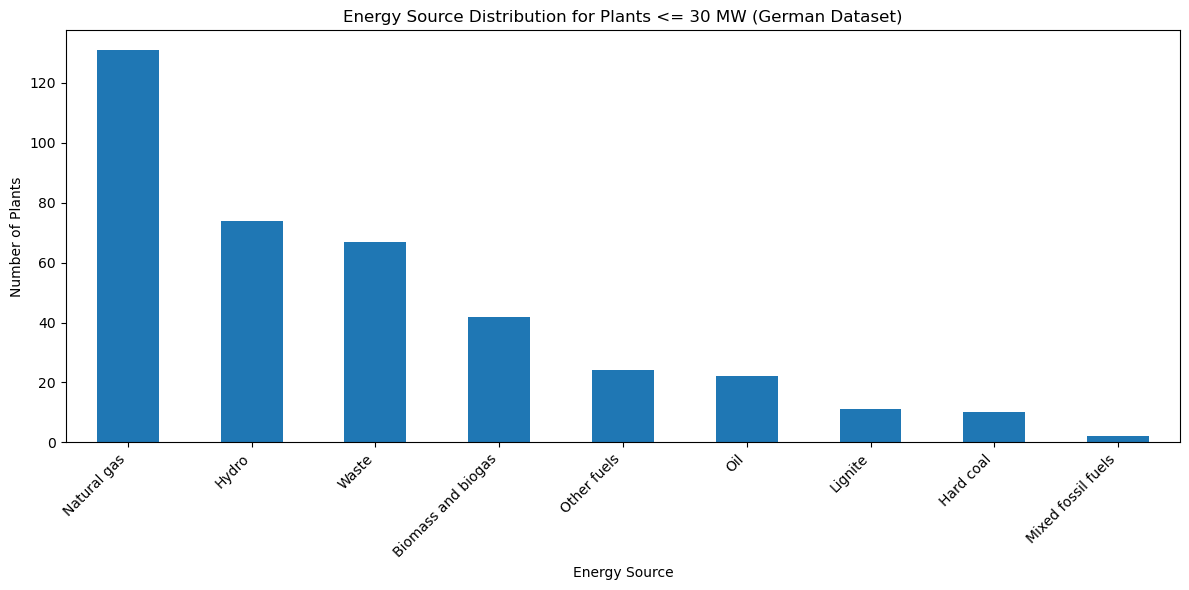


Distribution by energy_source_level_1:
energy_source_level_1
Fossil fuels                           174
Renewable energy                       116
Other or unspecified energy sources     67
Other                                   24
Name: count, dtype: int64


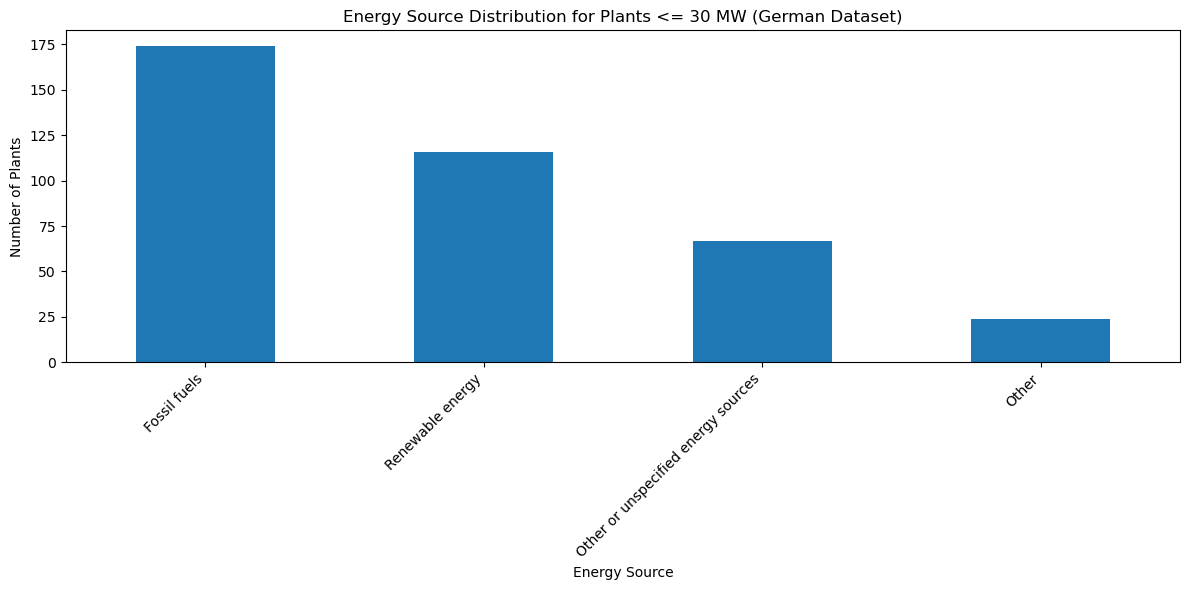


Distribution by energy_source_level_2:
energy_source_level_2
Natural gas    131
Hydro           74
Waste           67
Bioenergy       42
Other fuels     24
Oil             22
Lignite         11
Hard coal       10
Name: count, dtype: int64


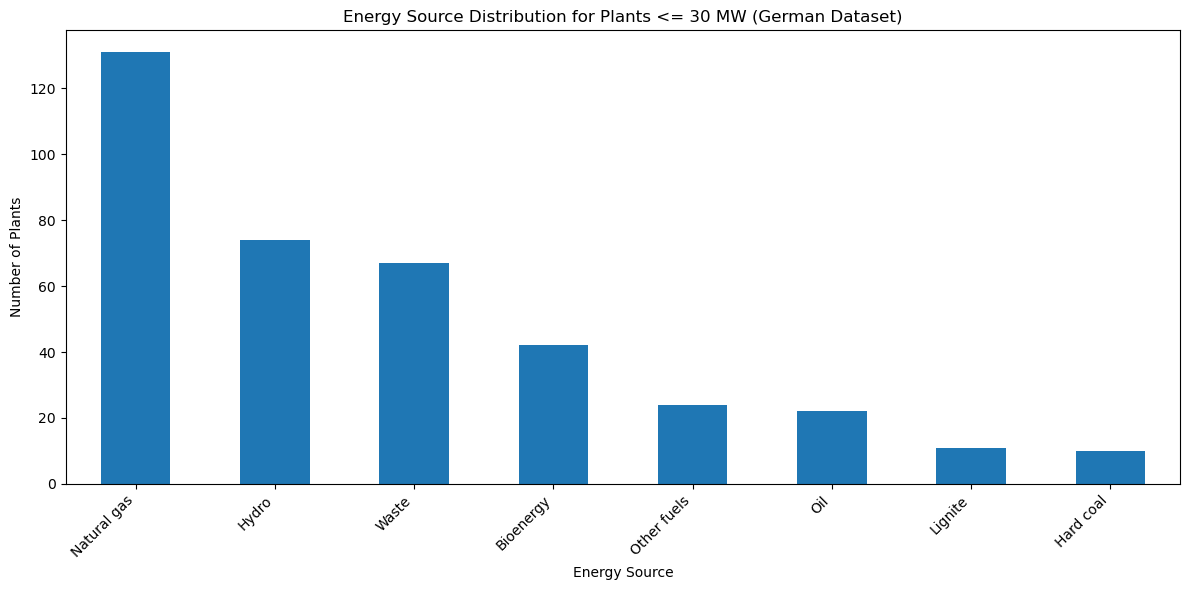


Distribution by energy_source_level_3:
energy_source_level_3
Biomass and biogas    42
Name: count, dtype: int64


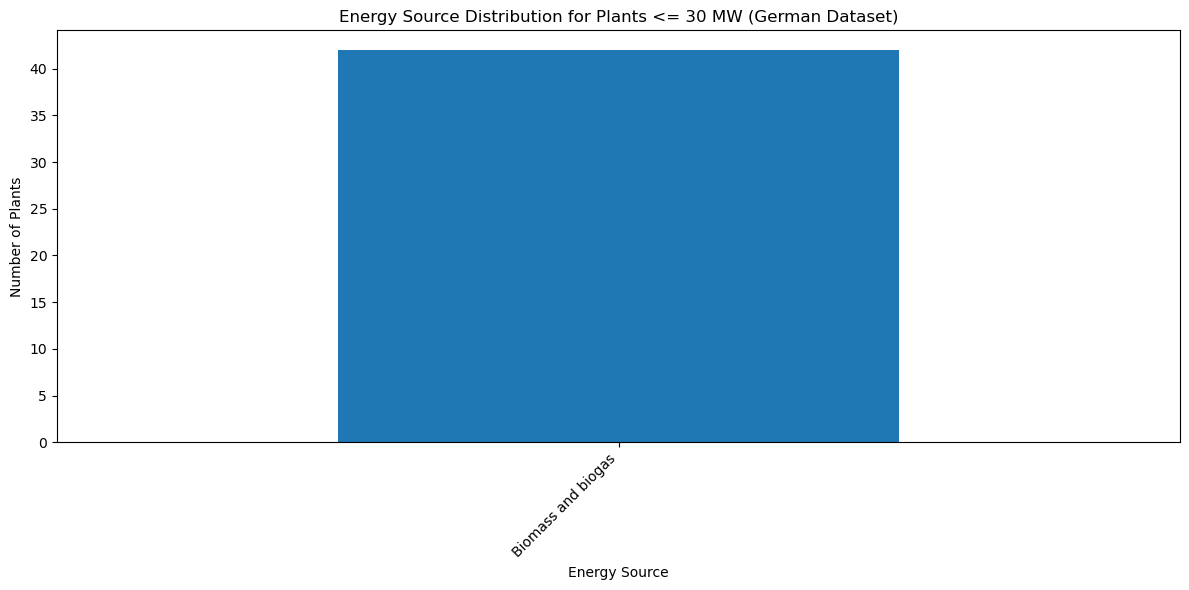


Analyzing energy source distribution for small plants in European Dataset (capacity <= 30 MW):
Found 3913 plants with capacity <= 30 MW

Distribution by energy_source:
energy_source
Hydro                                  3249
Natural gas                             179
Hard coal                               144
Biomass and biogas                       95
Waste                                    67
Oil                                      56
Lignite                                  41
Non-renewable waste                      27
Other fuels                              24
Mixed fossil fuels                       16
Other fossil fuels                        7
Other or unspecified energy sources       4
Bioenergy                                 3
Name: count, dtype: int64


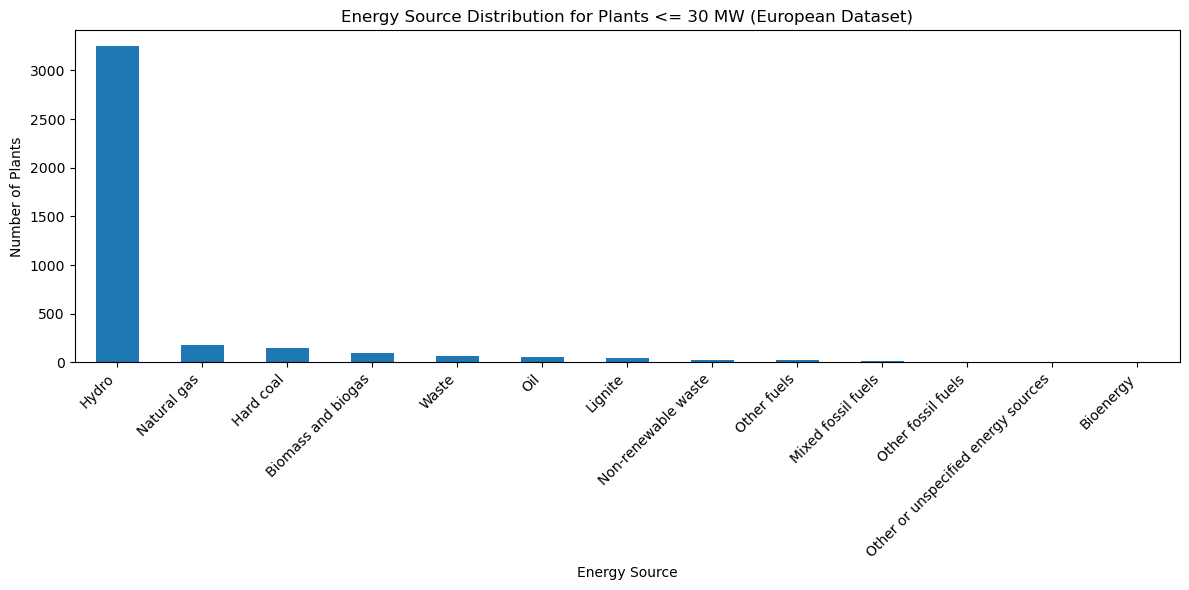


Distribution by energy_source_level_1:
energy_source_level_1
Renewable energy                       3347
Fossil fuels                            468
Other or unspecified energy sources      71
Other                                    24
Name: count, dtype: int64


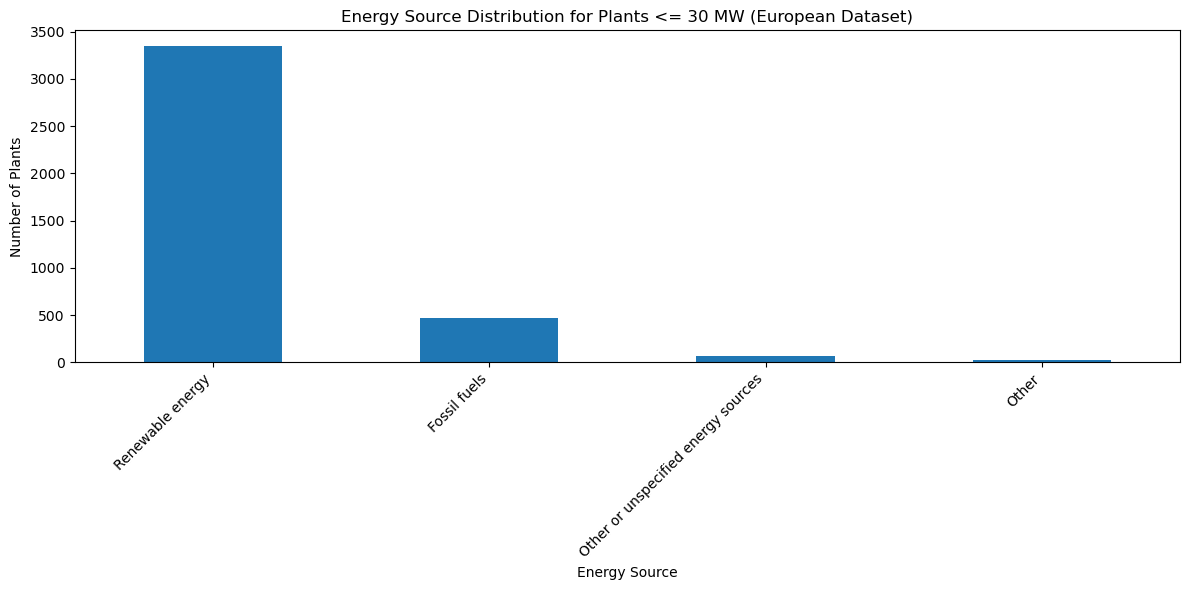


Distribution by energy_source_level_2:
energy_source_level_2
Hydro                  3249
Natural gas             179
Hard coal               144
Bioenergy                98
Waste                    67
Oil                      56
Lignite                  41
Non-renewable waste      27
Other fuels              24
Mixed fossil fuels       14
Other fossil fuels        7
Name: count, dtype: int64


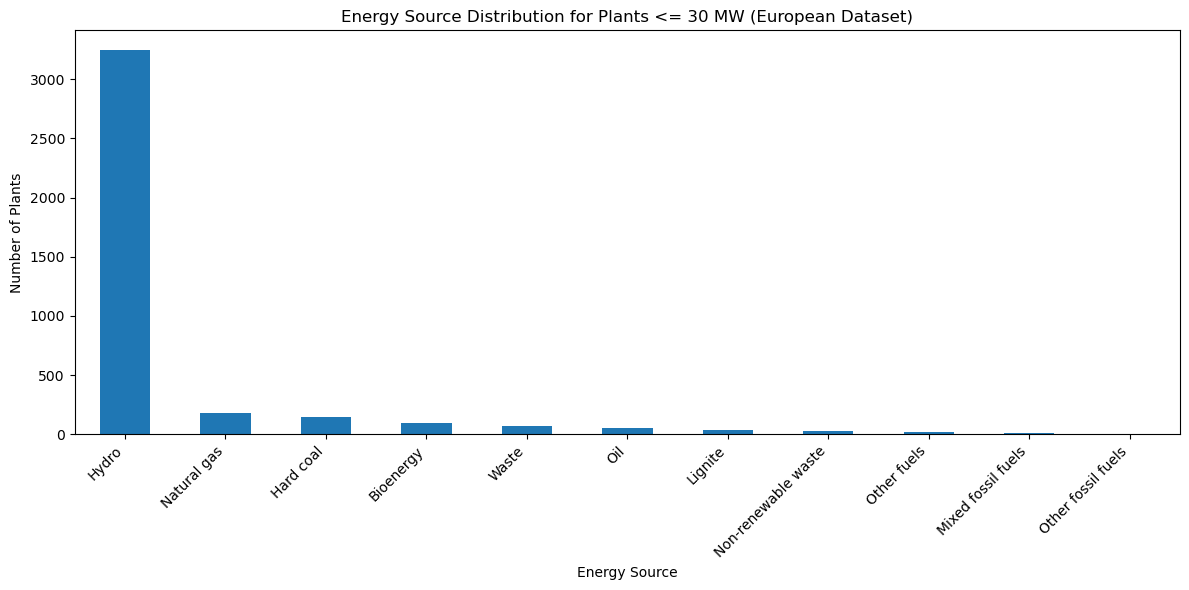


Distribution by energy_source_level_3:
energy_source_level_3
Biomass and biogas    95
Name: count, dtype: int64


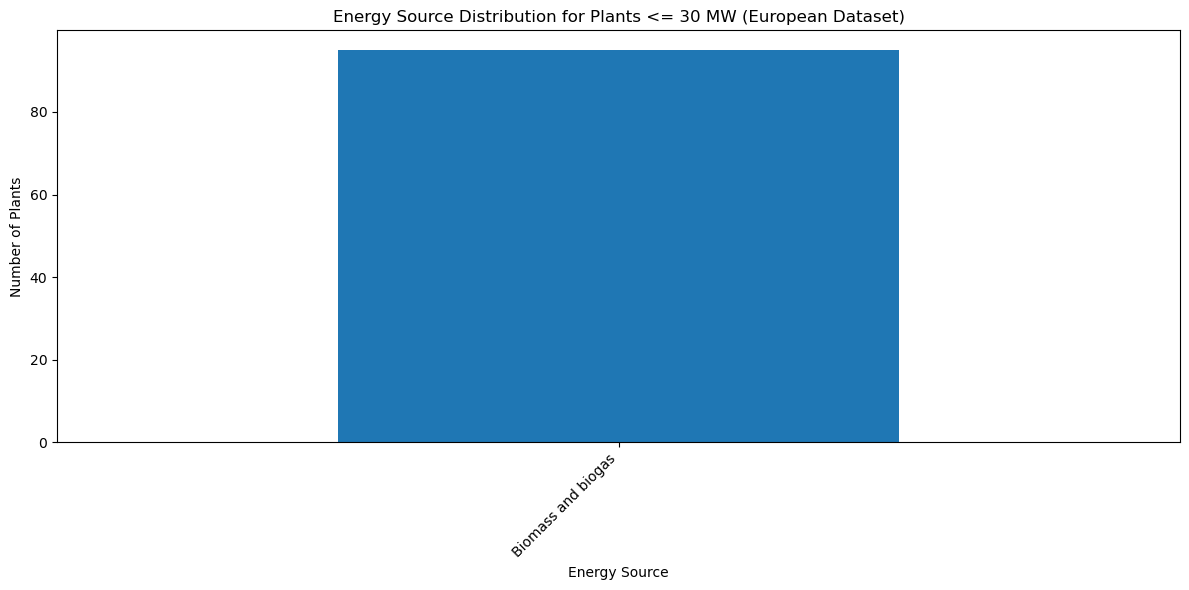

In [24]:
small_de_plants = show_energy_distribution(df_de_csv, "German Dataset")
small_eu_plants = show_energy_distribution(df_eu_csv, "European Dataset")